Volumetric wavelet Data Processing
==================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores volumetric (3D) data processing.

In [1]:
options(repr.plot.width=3.5, repr.plot.height=3.5)
options(warn=-1) # turns off warnings, to turn on: "options(warn=0)"


library(imager)
library(png)
library(misc3d)
library(SynchWave)

source("nt_toolbox/general.R")
source("nt_toolbox/signal.R")

Loading required package: plyr
Loading required package: magrittr

Attaching package: 'imager'

The following object is masked from 'package:magrittr':

    add

The following object is masked from 'package:plyr':

    liply

The following objects are masked from 'package:stats':

    convolve, spectrum

The following object is masked from 'package:graphics':

    frame

The following object is masked from 'package:base':

    save.image

Loading required package: fields
Loading required package: spam
Loading required package: grid

Attaching package: 'grid'

The following object is masked from 'package:imager':

    depth

Spam version 1.4-0 (2016-08-29) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following object is masked from 'package:imager':

    display

The following 

3D Volumetric Datasets
----------------------


We load a volumetric data.

In [2]:
source("nt_toolbox/read_bin.R")
M <- read_bin("nt_toolbox/data/vessels.bin", ndims=3)

In [3]:
M <- rescale(M)

Size of the image (here it is a cube).

In [4]:
n <- dim(M)[2]

We can display some horizontal slices.

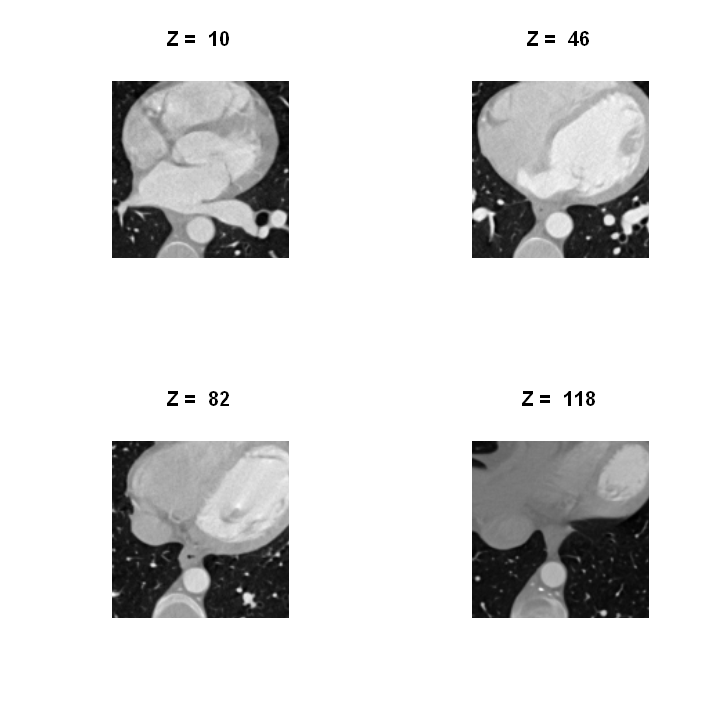

In [5]:
options(repr.plot.width=6, repr.plot.height=6)

slices <- seq(10,n-10, length = 4)
for (i in 1:length(slices)){
    s <- slices[i]
    s <- as.integer(s)
    imageplot(M[,,s], paste("Z = ",s), c(2,2,i)) }

We can display an isosurface of the dataset (here we sub-sample to speed
up the computation).

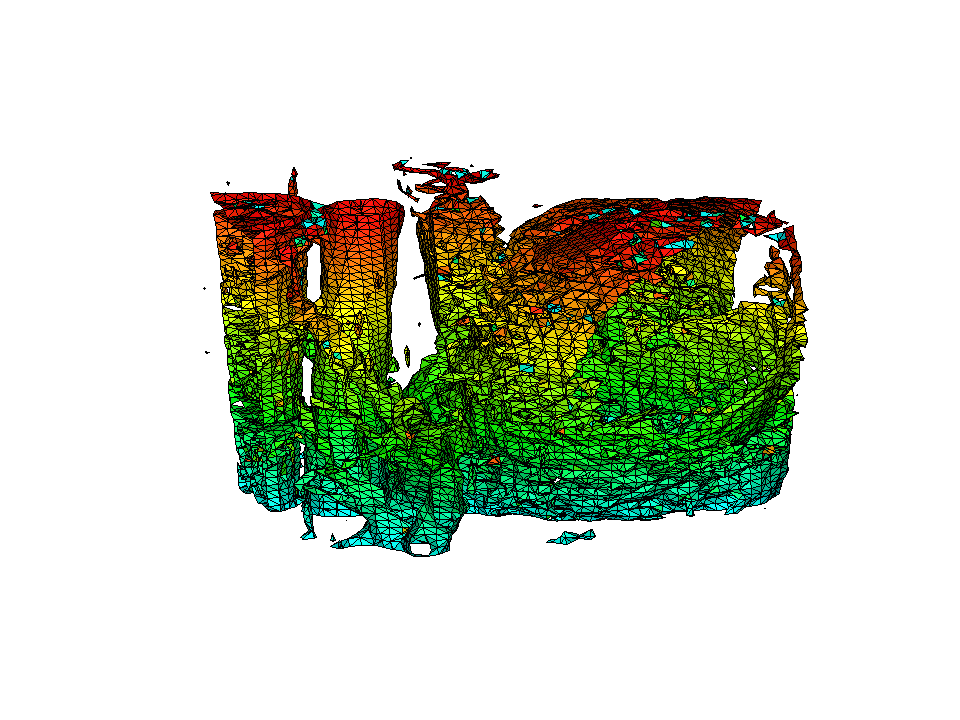

In [6]:
options(repr.plot.width=8, repr.plot.height=6)

source("nt_toolbox/isosurface.R")
isosurface(M,0.5,3)

3D Haar Transform
-----------------
An isotropic 3D Haar transform recursively extracts details wavelet
coefficients by performing local averages/differences along the X/Y/Z axis.


We apply a step of Haar transform in the X/Y/Z direction

Initialize the transform

In [7]:
MW <- M

Average/difference along X

In [8]:
a <- (MW[seq(1,n,2),,] + MW[seq(2,n,2),,])/sqrt(2)
b <- (MW[seq(1,n,2),,] - MW[seq(2,n,2),,])/sqrt(2)
c <- array(0, c(n, n, n))
c[1:(n/2),,] <- a
c[(n/2+1):n,,] <- b
MW <- c

Average/difference along Y

In [9]:
a <- (MW[,seq(1,n,2),] + MW[,seq(2,n,2),])/sqrt(2)
b <- (MW[,seq(1,n,2),] - MW[,seq(2,n,2),])/sqrt(2)
c <- array(0, c(n, n, n))
c[,1:(n/2),] <- a
c[,(n/2+1):n,] <- b
MW <- c

Average/difference along Z

In [10]:
a <- (MW[,,seq(1,n,2)] + MW[,,seq(2,n,2)])/sqrt(2)
b <- (MW[,,seq(1,n,2)] - MW[,,seq(2,n,2)])/sqrt(2)
c <- array(0, c(n, n, n))
c[,,1:(n/2)] <- a
c[,,(n/2+1):n] <- b
MW <- c

Display a horizontal and vertical slice to see the structure of the coefficients.

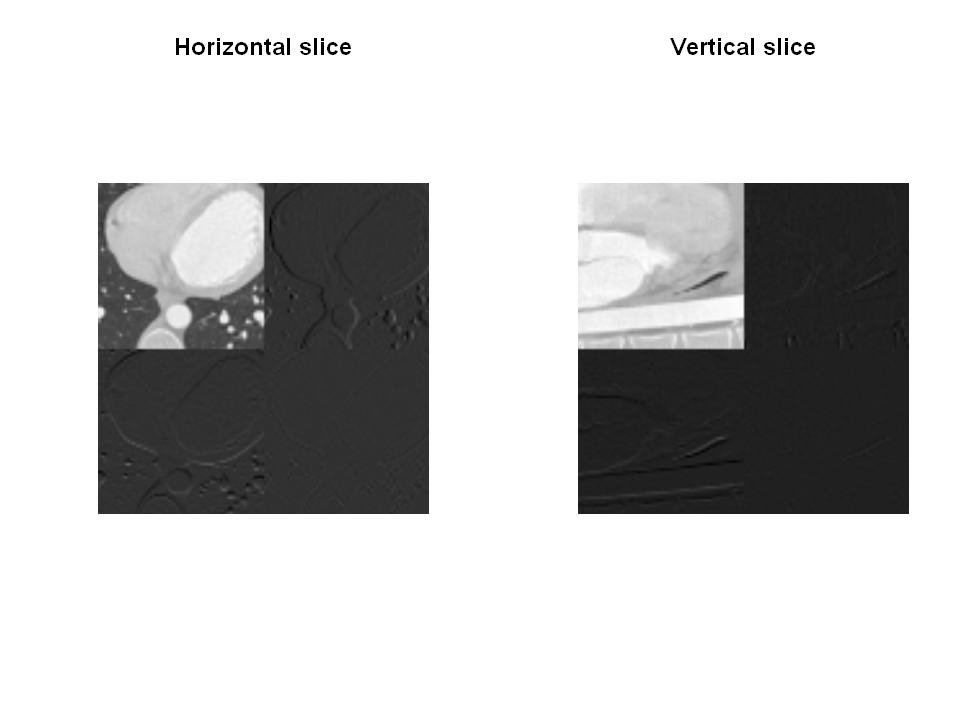

In [11]:
options(repr.plot.width=8, repr.plot.height=6)

imageplot(MW[,,30], "Horizontal slice", c(1,2,1))
imageplot((MW[,30,]), "Vertical slice", c(1,2,2))

__Exercise 1__

Implement the forward wavelet transform by iteratively applying these
transform steps to the low pass residual.

In [12]:
source("nt_solutions/multidim_2_volumetric/exo1.R")

In [13]:
## Insert your code here.

Volumetric Data Haar Approximation
----------------------------------
An approximation is obtained by keeping only the largest coefficients.


We threshold the coefficients to perform $m$-term approximation.

number of kept coefficients

In [14]:
source("nt_toolbox/perform_thresholding.R")

m <- round(0.01*n**3)
MWT <- perform_thresholding(MW, m, type="largest")

__Exercise 2__

Implement the backward transform to compute an approximation $M_1$ from
the coefficients MWT.

In [15]:
source("nt_solutions/multidim_2_volumetric/exo2.R")

Display the approximation as slices.

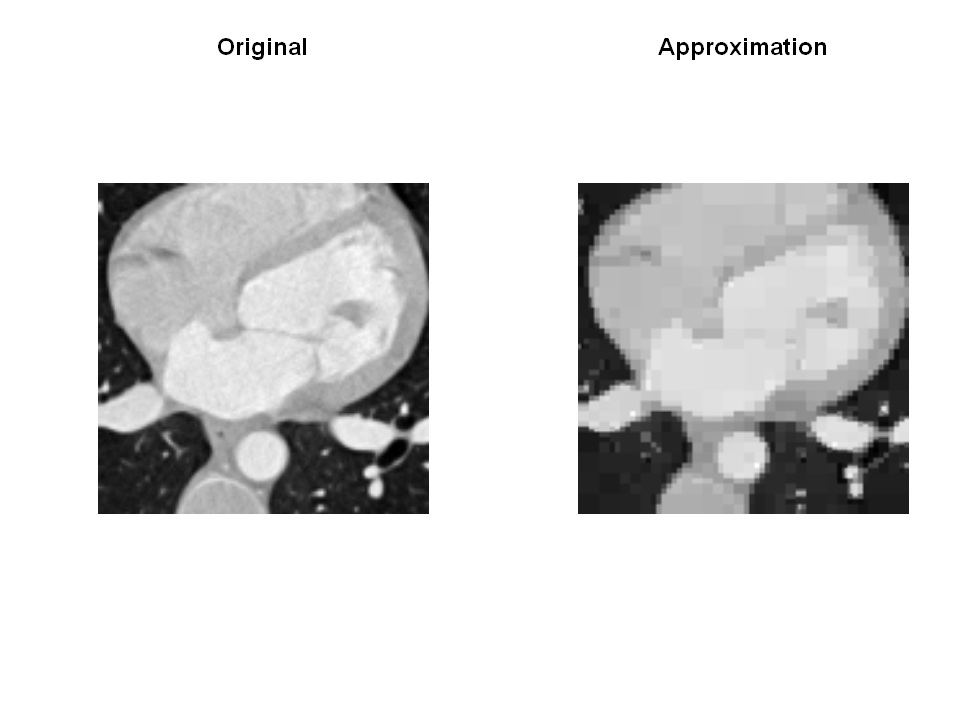

In [16]:
s <- 30

imageplot(M[, ,s], 'Original', c(1,2,1))
imageplot(clamp(M1[, ,s]), 'Approximation', c(1,2,2))

Display the approximated isosurface.

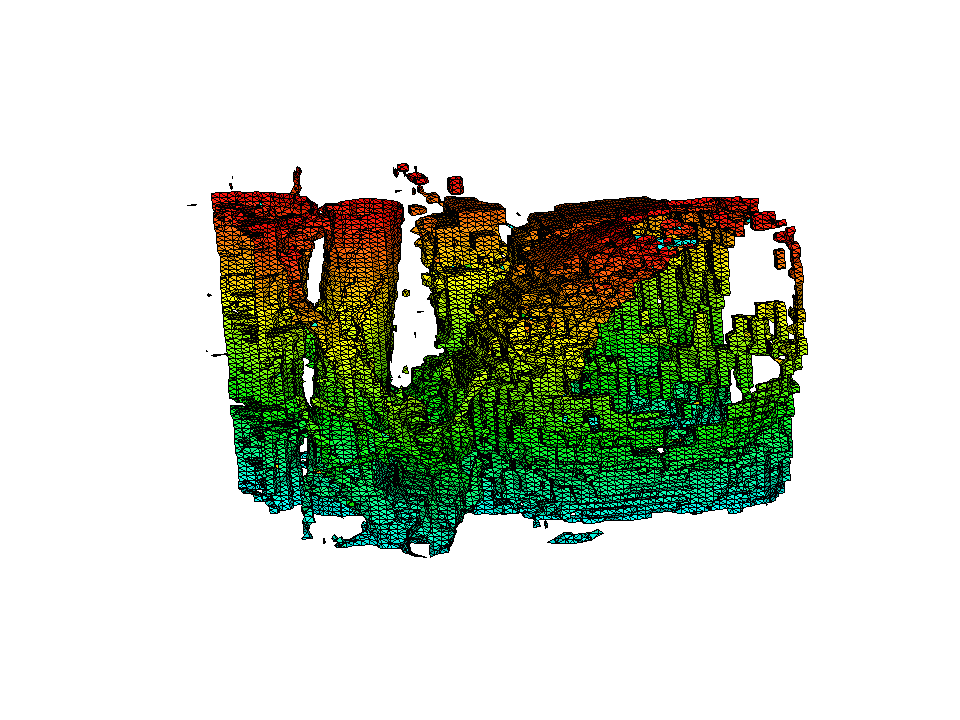

In [17]:
isosurface(M1,.5,2)

Linear Volumetric Denoising 
----------------------------
Linear denoising is obtained by low pass filtering.


We add a Gaussian noise to the image.

In [18]:
sigma <- 0.06
Mnoisy <- M + array(rnorm(n**3, sd = sigma), c(n,n,n))

Display slices of the noisy data.

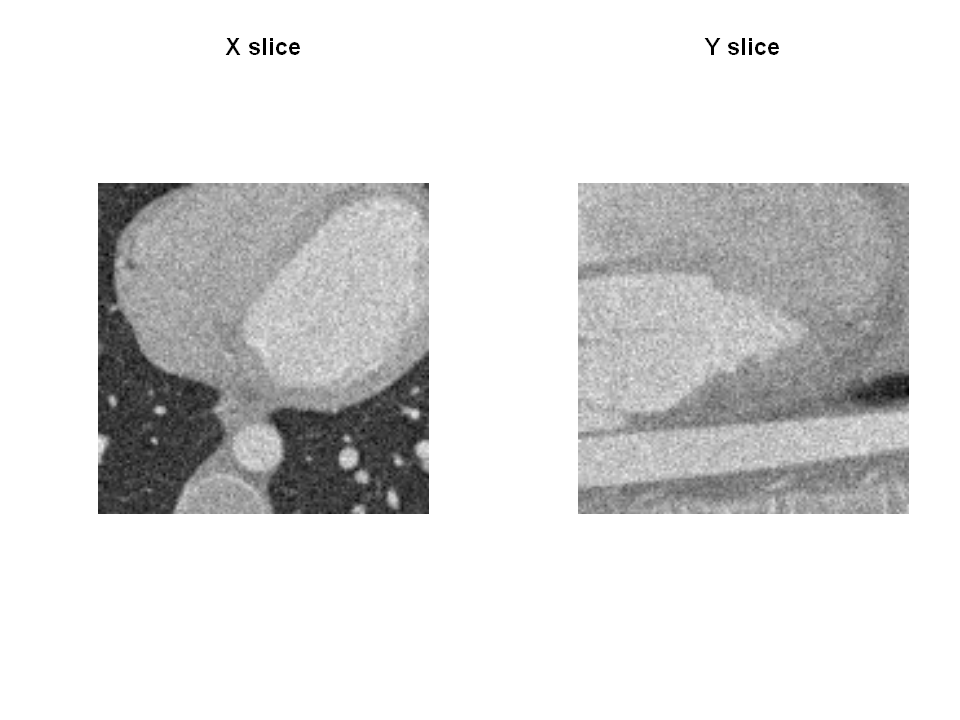

In [19]:
imageplot(Mnoisy[,,n/2],"X slice",c(1,2,1))
imageplot(Mnoisy[,n/2,],"Y slice",c(1,2,2))

A simple denoising method performs a linear filtering of the data.


We build a Gaussian filter of width $\sigma$.

Construct a 3D grid

In [20]:
source("nt_toolbox/meshgrid.R")

x <- (-round(n/2):(round(n/2)-1))
grid <- meshgrid_3d(x, x, x)
X <- grid$X ; Y <- grid$Y ; Z <-grid$Z

Gaussian filter

In [21]:
s <- 2 #width
h <- exp(-(X**2 + Y**2 + Z**2)/(2*(s**2)))
h <- h/sum(h)

The filtering is computed over the Fourier domain.

In [22]:
source("nt_toolbox/fftshift_3d.R")

Mh <- Re(fft( fft(Mnoisy) * fft(fftshift_3d(h)), inverse=T))

Display denoised slices.

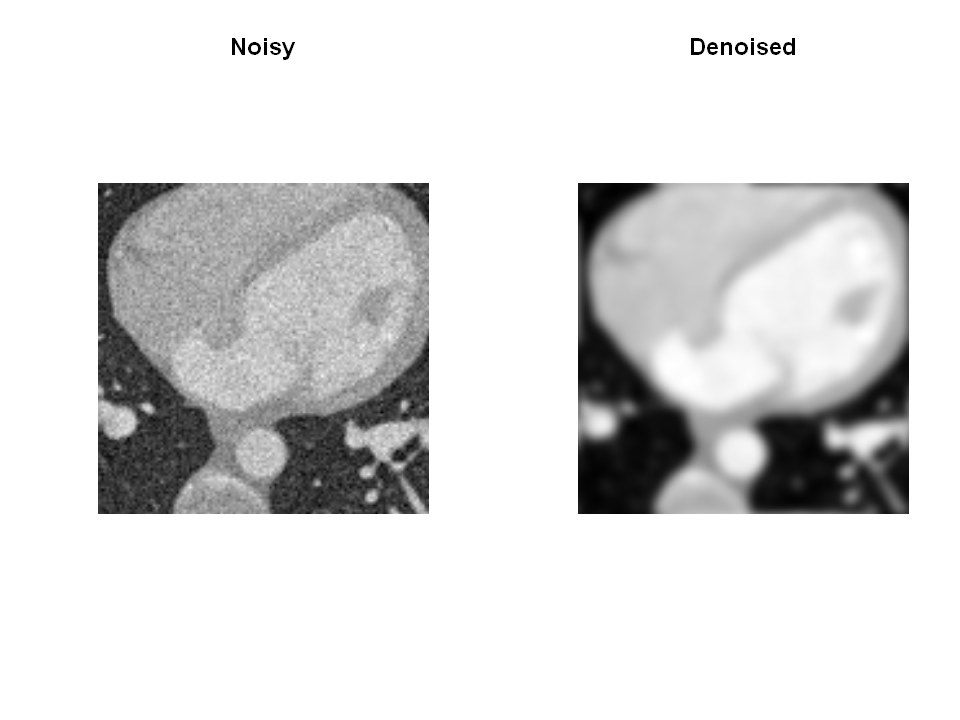

In [23]:
options(repr.plot.width=8, repr.plot.height=6)

i <- 40
imageplot(Mnoisy[,,i], "Noisy", c(1,2,1))
imageplot(Mh[,,i], "Denoised", c(1,2,2))

Display denoised iso-surface.

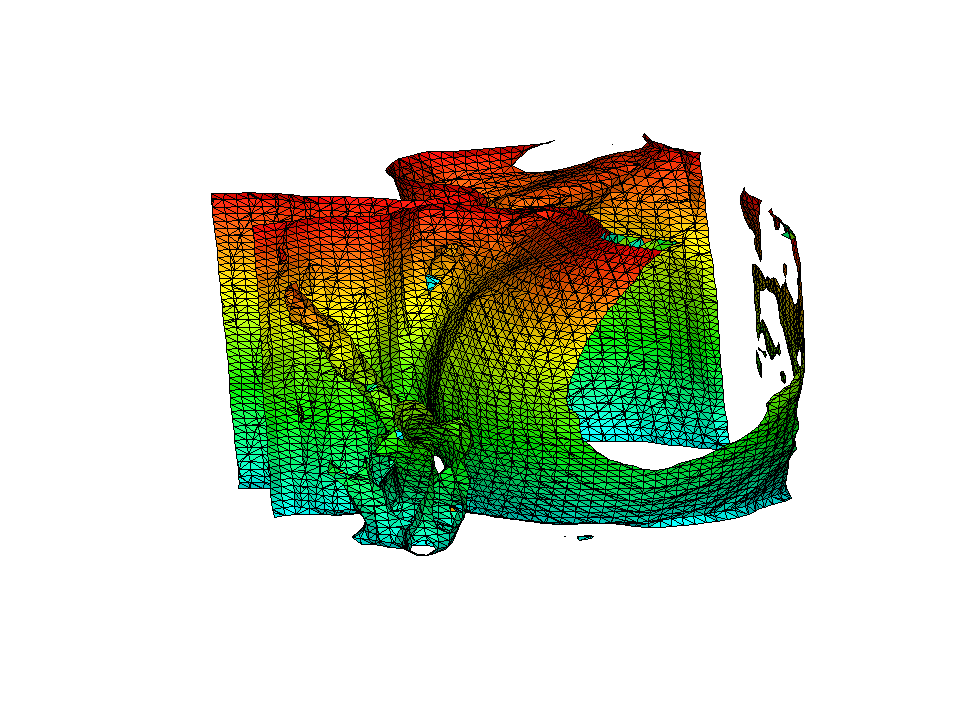

In [24]:
isosurface(rescale(Mh),.5,3)

__Exercise 3__

Select the optimal blurring width $s$ to reach the smallest possible
SNR. Keep the optimal denoising Mblur.

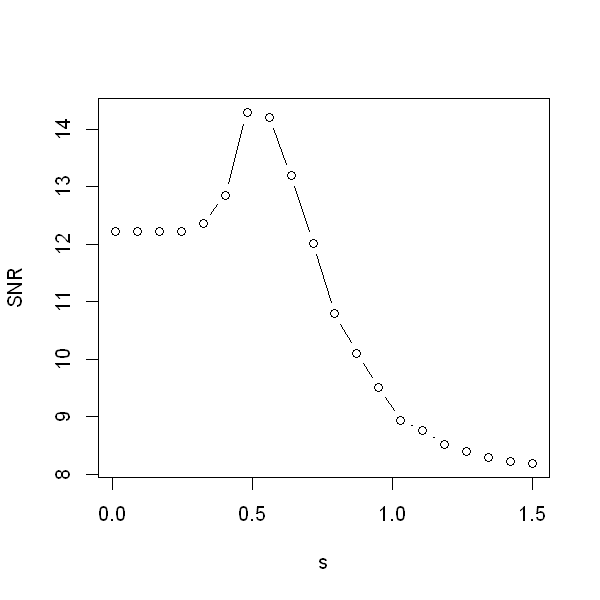

In [25]:
options(repr.plot.width=5, repr.plot.height=5)

source("nt_solutions/multidim_2_volumetric/exo3.R")

In [26]:
## Insert your code here.

Display optimally denoised iso-surface.

[1] "Filtering, SNR =  14.2932163894666 dB"

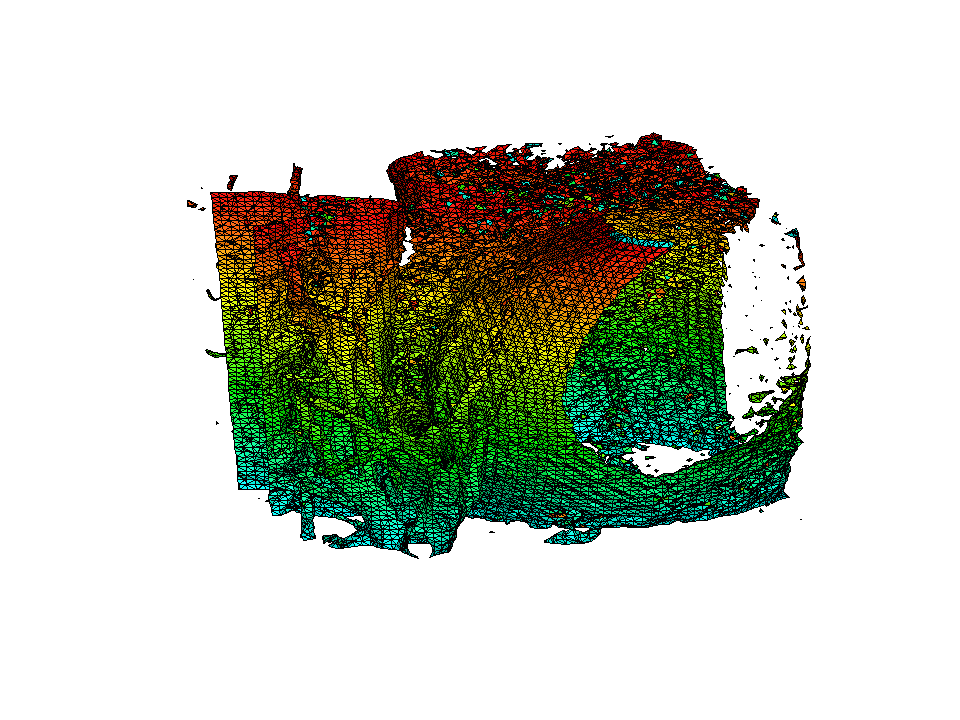

In [27]:
options(repr.plot.width=8, repr.plot.height=6)

isosurface(Mblur,.5,2)
paste("Filtering, SNR = ", snr(M, Mblur), "dB")

Non-Linear Wavelet Volumetric Denoising 
----------------------------------------
Denoising is obtained by removing small amplitude coefficients that
corresponds to noise.

__Exercise 4__

Perforn Wavelet denoising by thresholding the wavelet coefficients of
Mnoisy. Test both hard thresholding and soft thresholding to determine
the optimal threshold and the corresponding SNR.
Record the optimal result Mwav.

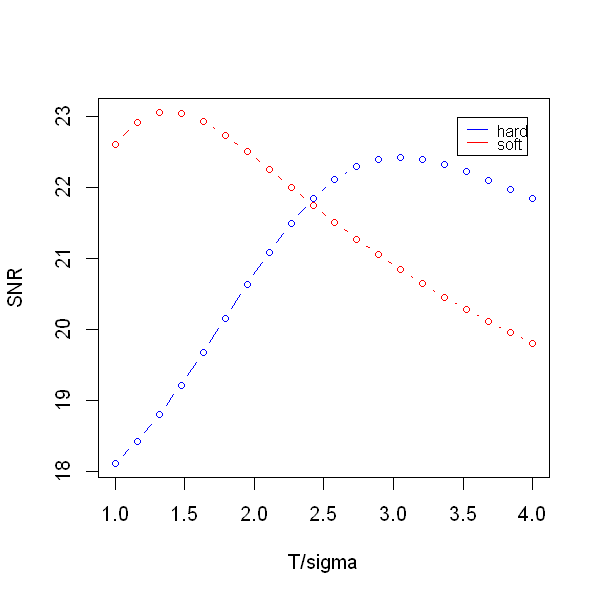

In [28]:
options(repr.plot.width=5, repr.plot.height=5)

source("nt_toolbox/perform_haar_transf.R")
source("nt_solutions/multidim_2_volumetric/exo4.R")

In [29]:
## Insert your code here.

Display denoised iso-surface with optimal soft thresholding.

[1] "Soft thresholding, SNR =  23.0548749047125 dB"

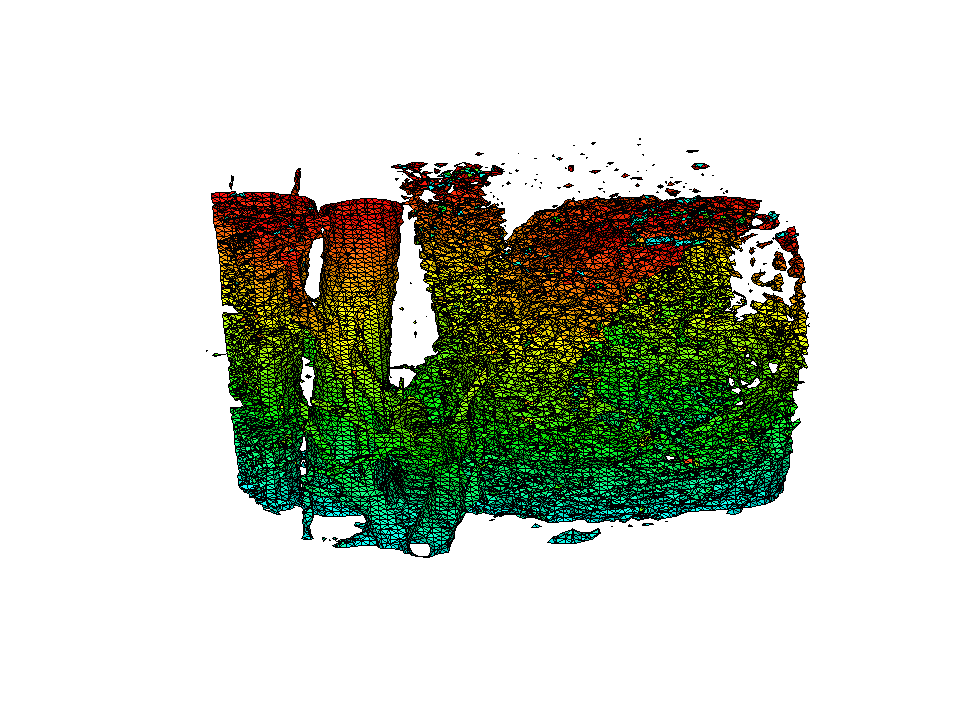

In [30]:
options(repr.plot.width=8, repr.plot.height=6)

isosurface(Mwav,.5,2)
paste("Soft thresholding, SNR = ", snr(M, Mwav), "dB")

Orthogonal wavelet thresholdings suffers from blocking artifacts.
This can be aleviated by performing a cycle spinning denoising, which
averages the denosing result of translated version of the signal.


A typical cycle spinning process is like this.

Maximum translation.

In [31]:
w <- 4

List of translations.

In [32]:
grid <- meshgrid_3d(0:(w-1), 0:(w-1), 0:(w-1))
dZ <- grid$X ; dY <- grid$Y ; dX <- grid$Z

Initialize spinning process.

In [33]:
Mspin <- array(0, c(n,n,n))

Spin.

In [34]:
circshift <- function(x,v){
    x <- roll(x,v[1], axis = 1)
    x <- roll(x,v[2], axis = 2)
    x <- roll(x,v[3], axis = 3)
    return(x)
}


for (i in 1:w**3){
    # shift the image
    MnoisyC <- circshift(Mnoisy, c(dX[i],dY[i],dZ[i]))
    # denoise the image to get a result M1
    M1 <- MnoisyC; # replace this line by some denoising
    # shift inverse
    M1 <- circshift(M1, c(-dX[i],-dY[i],-dZ[i]))
    # average the result
    Mspin <- Mspin*(i-1)/(i) + M1/(i)
}

__Exercise 5__

Implement cycle spinning hard thresholding with $T=3\sigma$.

In [35]:
source("nt_solutions/multidim_2_volumetric/exo5.R")

In [36]:
## Insert your code here.

Display denoised iso-surface.

[1] "Cycle spinning, SNR =  26.3293396012998 dB"

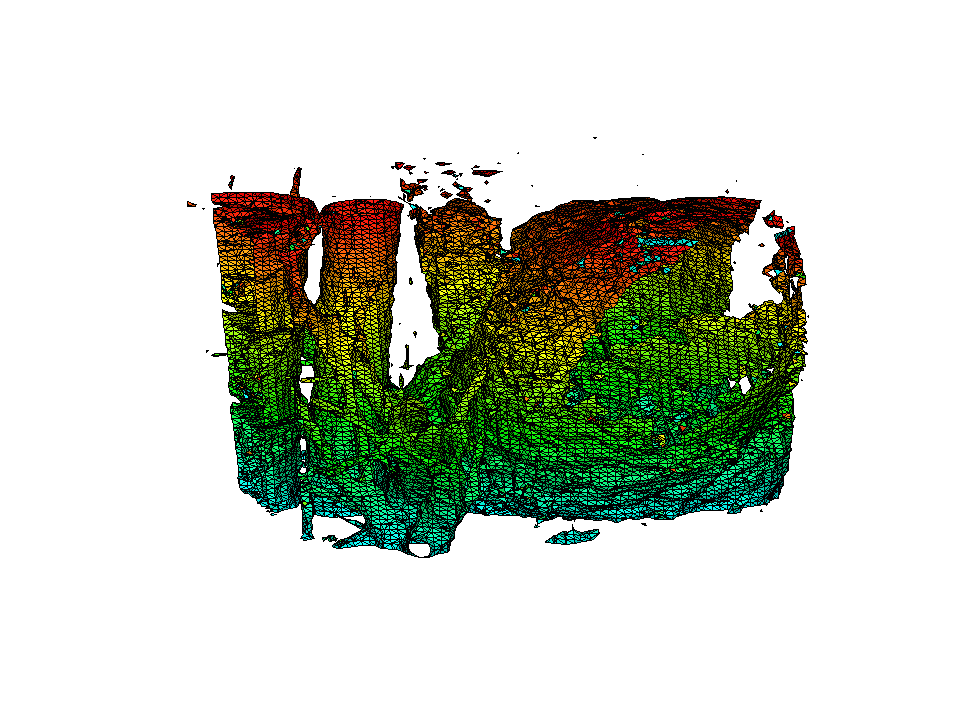

In [37]:
options(repr.plot.width=8, repr.plot.height=6)

isosurface(Mspin,.5,2)
paste("Cycle spinning, SNR = ", snr(M, Mspin), "dB")

In [ ]:
<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>